# Multivariate Linear Regression Model CheatSheet:

# Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load & explore the data

In [2]:
# Load & explore the data
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.shape

(244, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
df.duplicated().sum()

1

C:\Users\geeso\AppData\Local\Temp\ipykernel_38876\1266764684.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Matrix')

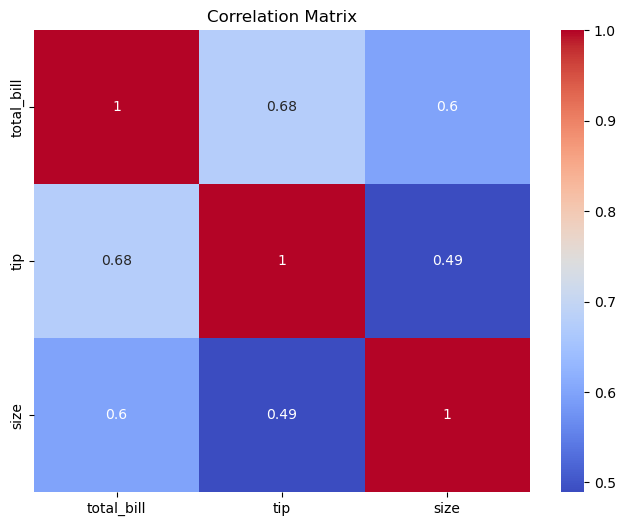

In [7]:
# Check Correlation
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

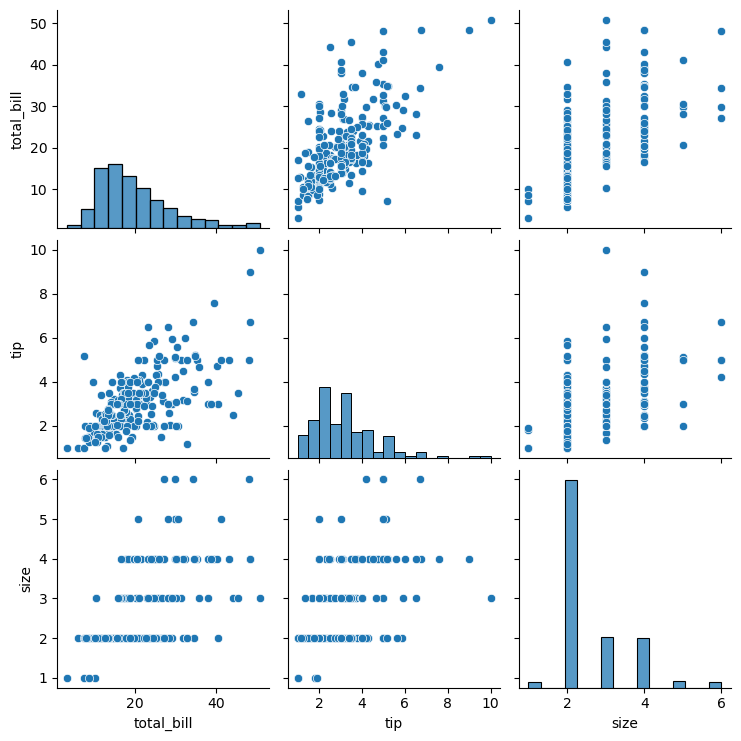

In [8]:
sns.pairplot(df)

# Split your data into features (X) and targets (y):

In [9]:
# Split your data into features (X) and targets (y)
x = df[['total_bill', 'size']]  # Include other relevant features
y = df['tip']

In [10]:
# Divide your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a LinearRegression model and train it using your training data:

In [11]:
# Create a LinearRegression model and train it using your training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Predict a new value using the trained model

In [14]:
# Predict a new value using the trained model
new_data_point = [[25, 4]]  # Example values for 'total_bill' and 'size'
predicted_tip = model.predict(new_data_point)
print("Predicted Tip for new data point:", predicted_tip)

Predicted Tip for new data point: [3.90023646]


C:\Users\geeso\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Evaluate the performance
**Mean Squared Error (MSE):** MSE measures the average squared difference between the actual and predicted values. It gives more weight to larger errors. A lower MSE indicates a better model fit.

**Mean Absolute Error (MAE):** MAE calculates the average absolute difference between the actual and predicted values. It treats all errors equally and is less sensitive to outliers compared to MSE.

**Root Mean Squared Error (RMSE):** RMSE is the square root of the MSE. It represents the typical magnitude of errors in the model's predictions. Like MSE, a lower RMSE indicates a better model fit.

In [15]:
# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.6485996190543518
Mean Absolute Error: 0.6639235737596483
Root Mean Squared Error: 0.8053568271607013


Text(0.5, 1.0, 'Actual vs. Predicted Tip')

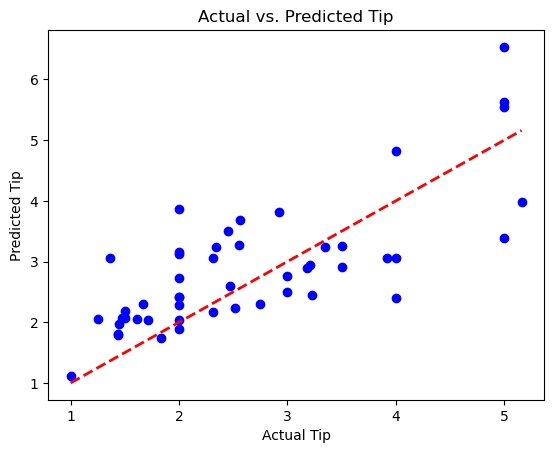

In [20]:
# Plot actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title("Actual vs. Predicted Tip")

Text(0, 0.5, 'Frequency')

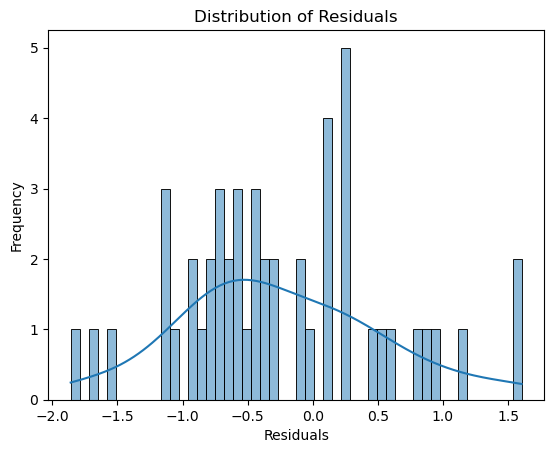

In [18]:
# Residual Analysis
residuals = y_test - y_pred
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

In [19]:
# Interpret the Model
coef = model.coef_
intercept = model.intercept_
print("Coefficients:", coef)
print("Intercept:", intercept)

# Calculate R-squared
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

Coefficients: [0.09088117 0.26501754]
Intercept: 0.5681370921350046
R-squared: 0.481108409798949
